In [182]:
import os
import string
import cufflinks as cf
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import seaborn as sns
from scipy import stats, integrate
from scipy.stats import t
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(100,60)},font='sans-serif', font_scale=4,color_codes=True)
np.random.seed(sum(map(ord,"distributions")))

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
cf.set_config_file(offline=True,world_readable=True,theme='ggplot')
df = pd.read_csv('/Users/nickpourazima/GitHub/he-sm/Completed Tests/Combo/Combo_Latest.csv')
users = ['394','412','390','399','486','591','510','729','932','521','514','379']
testList = ['A1a1','A1a2','A1a3','A1a4','A1b1','A1b2','A1b3','A1b4','A2a1','A2a2','A2a3','A2a4','A2b1','A2b2','A2b3','A2b4',
       'A3a1','A3a2','A3a3','A3a4','A3b1','A3b2','A3b3','A3b4','A4a1','A4a2','A4a3','A4a4','A4b1','A4b2','A4b3','A4b4',
       'H1a1','H1a2','H1a3','H1a4','H1b1','H1b2','H1b3','H1b4','H2a1','H2a2','H2a3','H2a4','H2b1','H2b2','H2b3','H2b4']
#            'P1H1a1','P2H1a2','P3H1b1','P4H1b2','P5H1b3','P6A1a2','P7A1b1','P8A2a1']
df = df[df.Test.isin(testList)]
# df.IOI = pd.to_timedelta((df.IOI),unit='ms')/np.timedelta64(1, 'ms')
# df.to_csv("Combo2.csv")

In [20]:
i=0;
j=0;
for item in pd.loc[pd['User ID']]:
    if(item == users[i]):
        for test in pd['Test']:
            if(test == testList[j]):
                pd['Corrected Mean'] = pd['Sanitized Asynchrony'].mean(skipna=False)
            else:
                j=j+1
    else:
        i=i+1

IndexError: list index out of range

In [18]:
filter1DF = pd.loc[(pd['User ID']==591)]
i=0;
j=0;
for x in filter1DF['Test']:
    if (x == testList[i]):
        filter1DF['Phase Correction Response'] = filter1DF['Sanitized Asynchrony'].shift(-1)-filter1DF['Sanitized Asynchrony']
    else:
        i=i+1
# print(filter1DF['Phase Correction Response'])
# filter1DF['Phase Correction Response'] = filter1DF['Test'].apply(lambda x: filter1DF['Sanitized Asynchrony'].shift(-1)-filter1DF['Sanitized Asynchrony'] if x == 'A1a1' else np.NaN)
filter1DF.to_csv("591 Mod.csv")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice fro

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

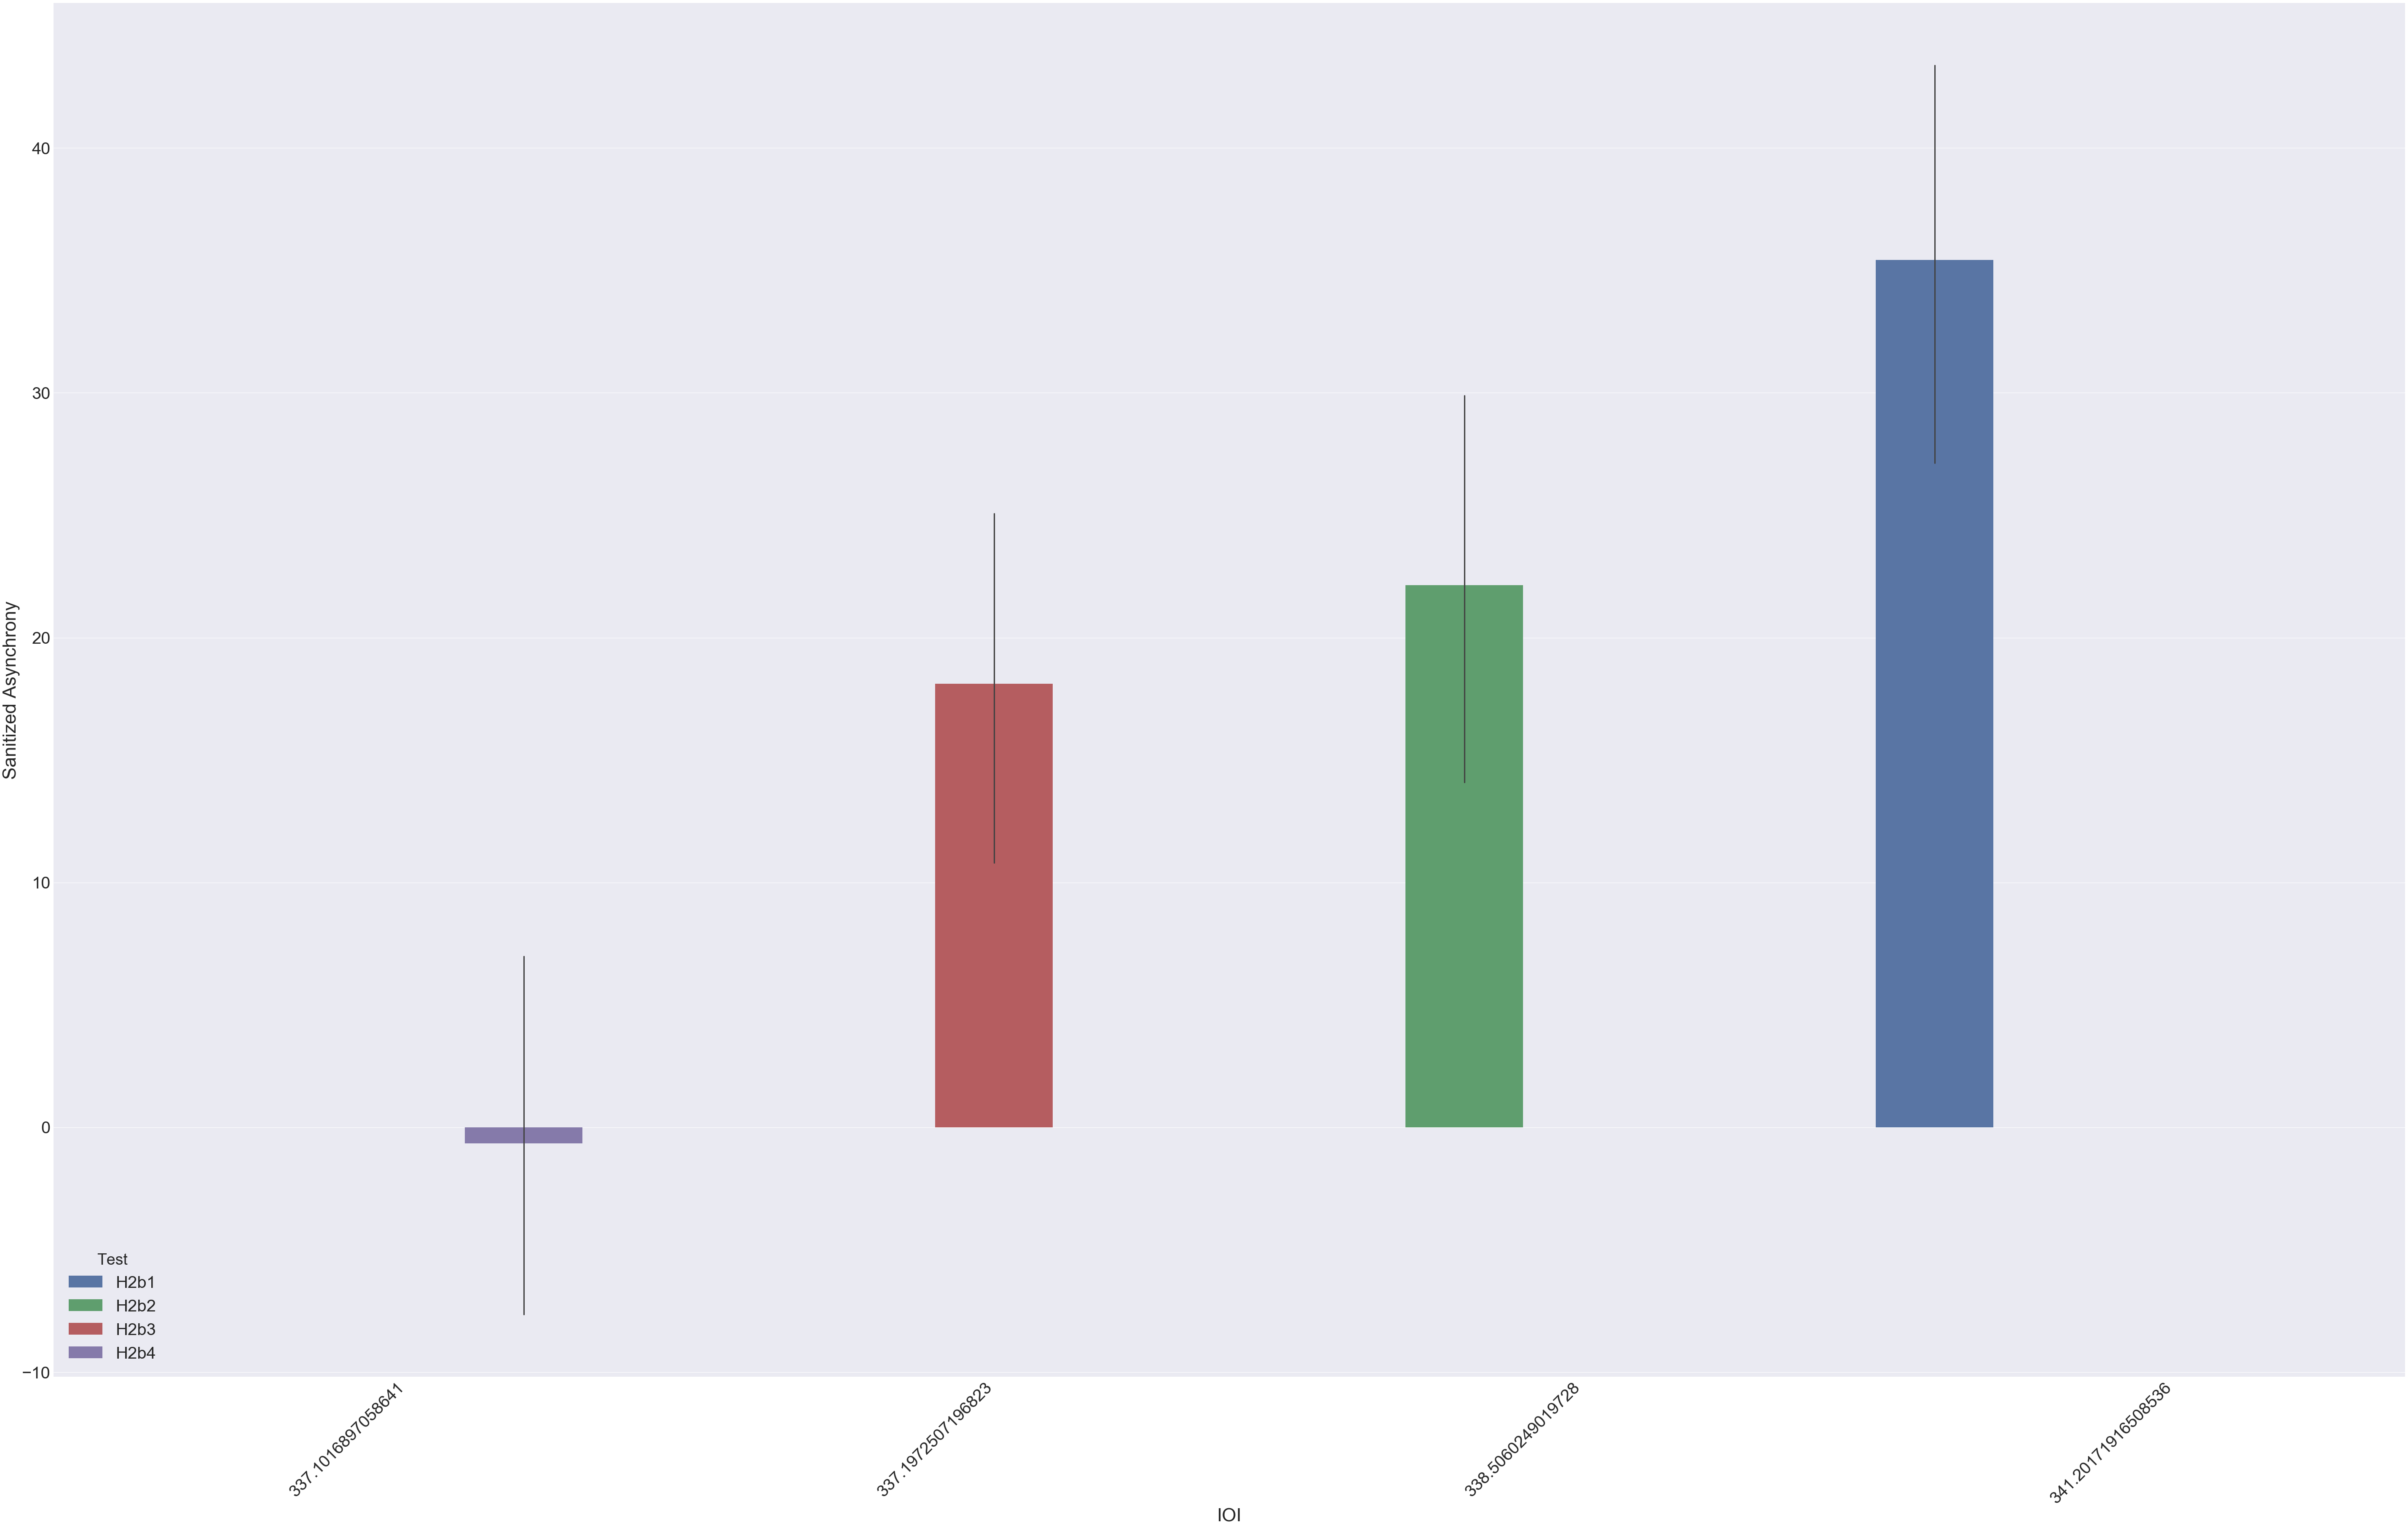

In [196]:
newList = ['H2b1','H2b2','H2b3','H2b4']
# df.IOI.describe()
newdf = df[df.Test.isin(newList)]
newdf.IOI[newdf.Test==newList[0]] = newdf.IOI.mean()
newdf.IOI[newdf.Test==newList[1]] = newdf.IOI.mean()
newdf.IOI[newdf.Test==newList[2]] = newdf.IOI.mean()
newdf.IOI[newdf.Test==newList[3]] = newdf.IOI.mean()
sns.barplot(y="Sanitized Asynchrony",x="IOI",data=newdf,hue="Test")
plt.xticks(rotation=45)

/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in less



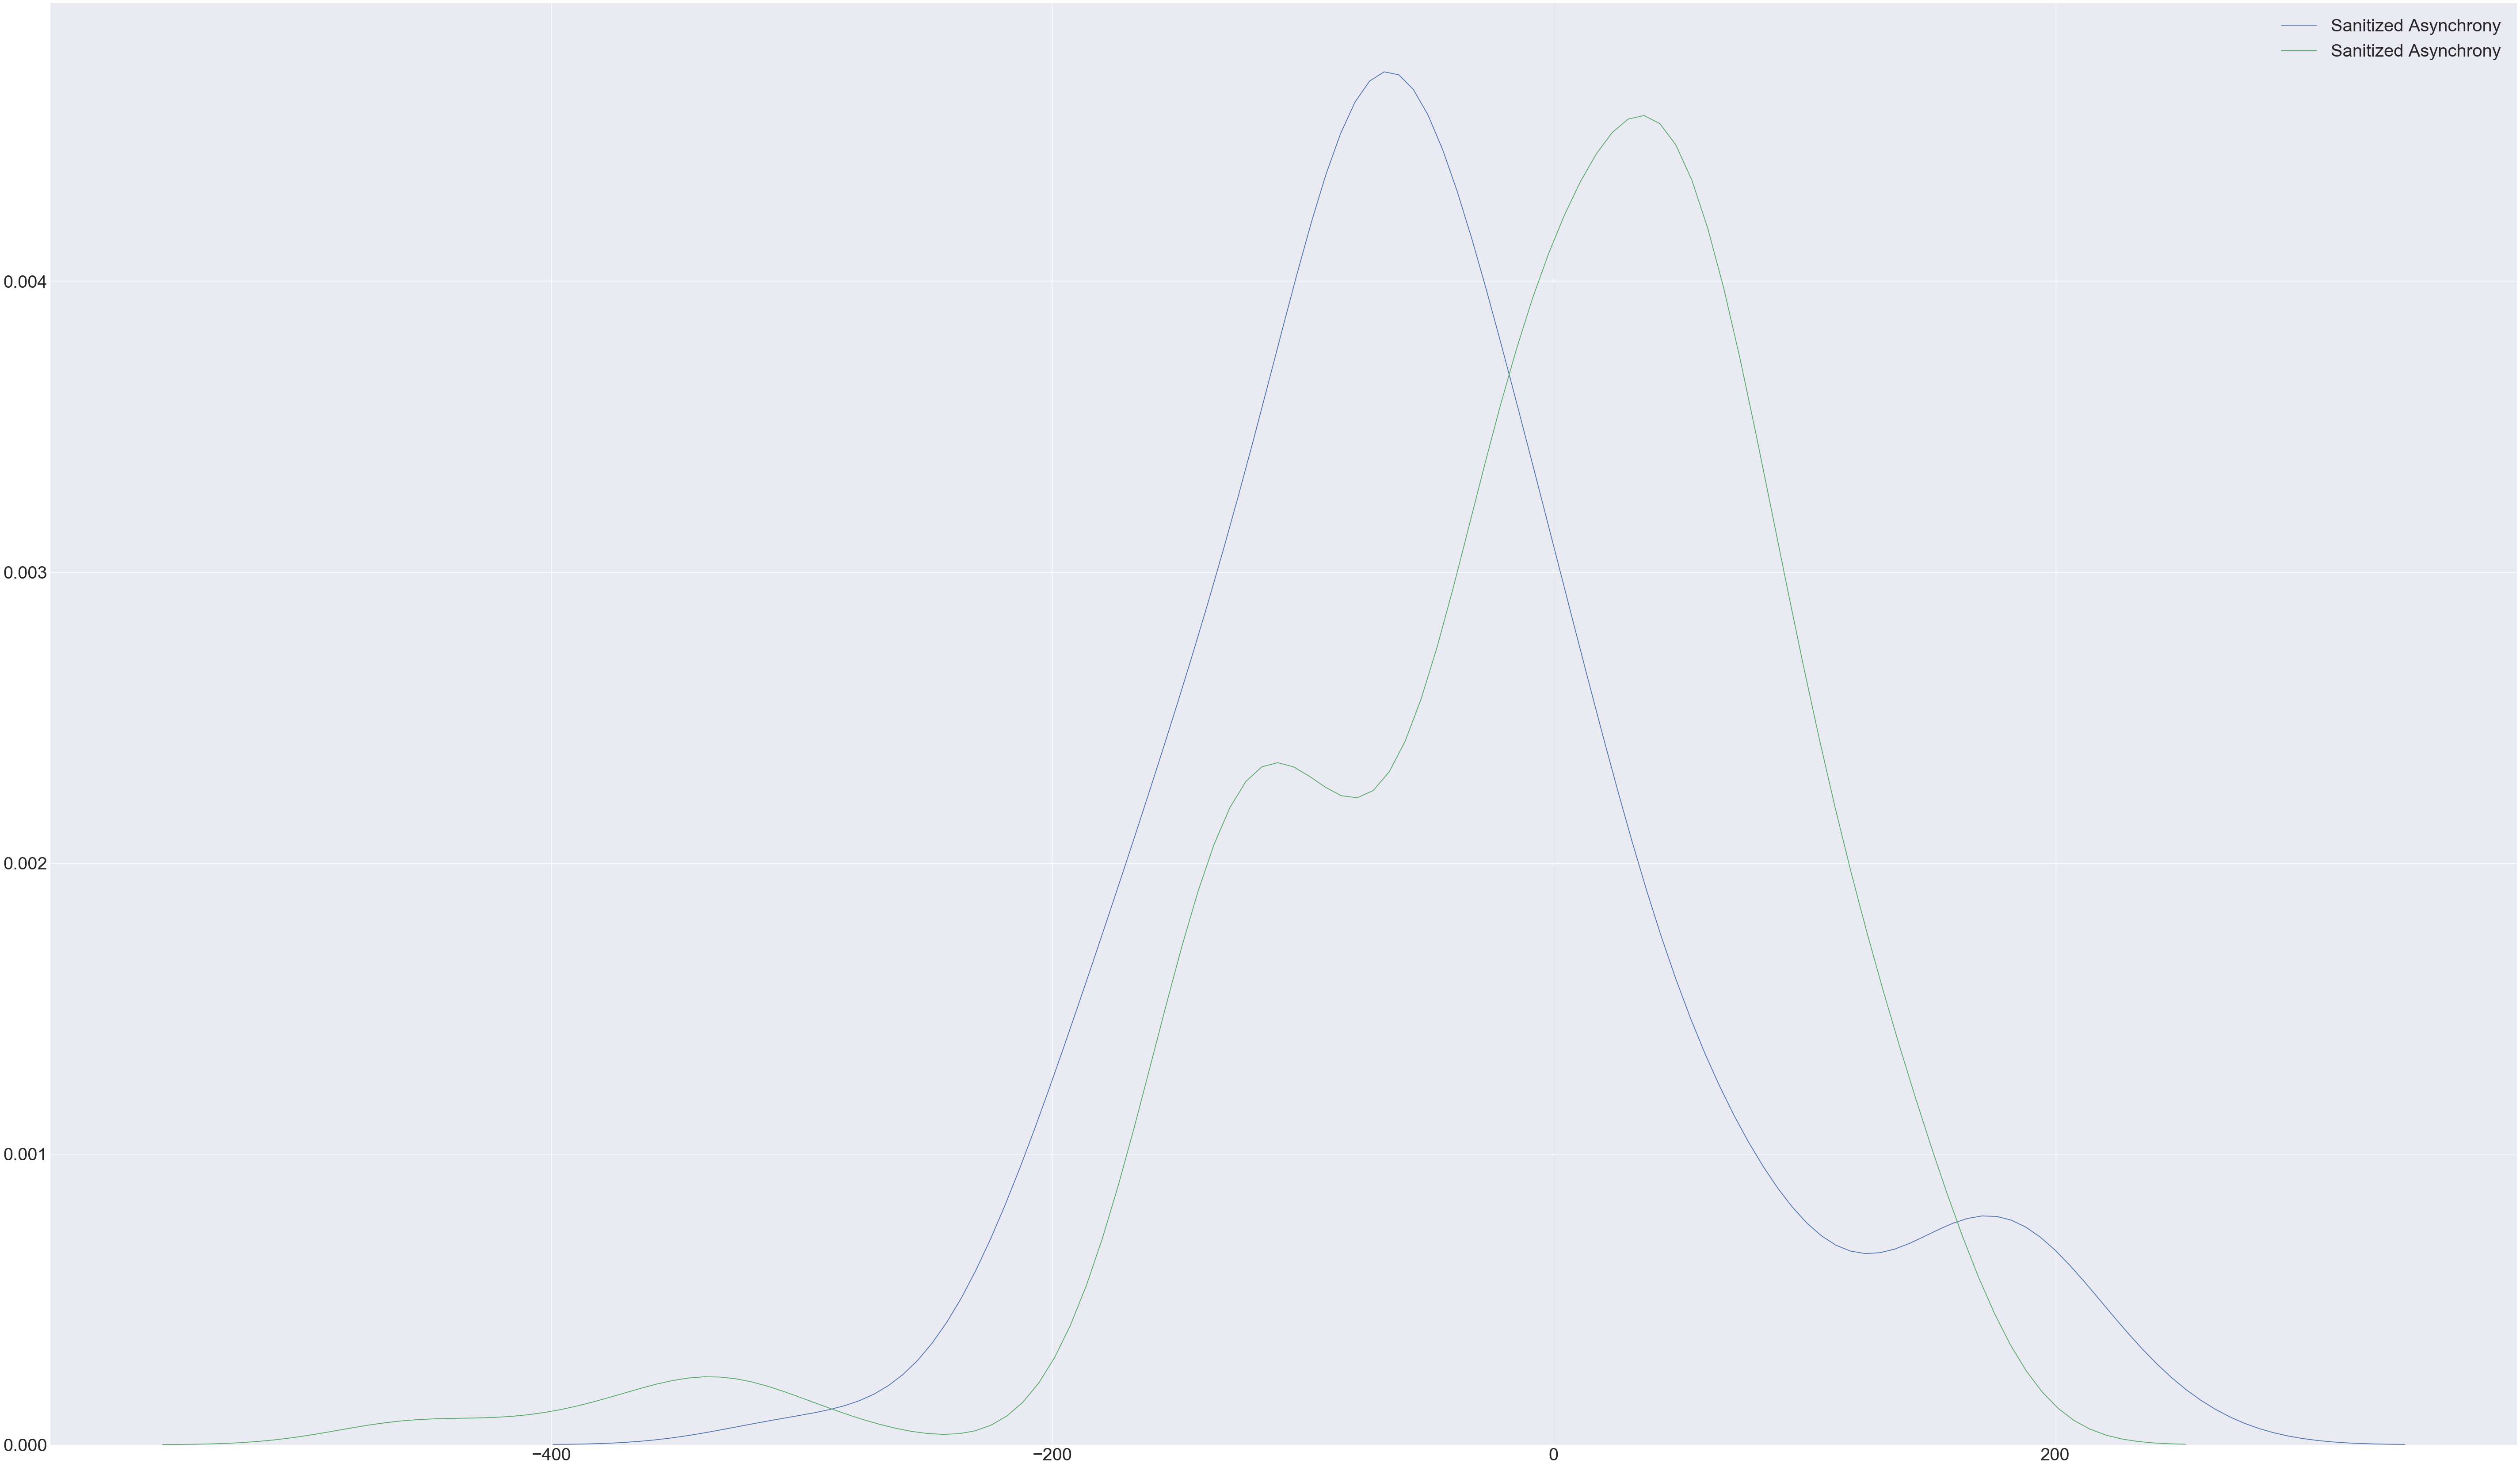

In [217]:
sns.kdeplot(df["Sanitized Asynchrony"][df.Test == testList[0]])
sns.kdeplot(df["Sanitized Asynchrony"][df.Test == testList[32]])

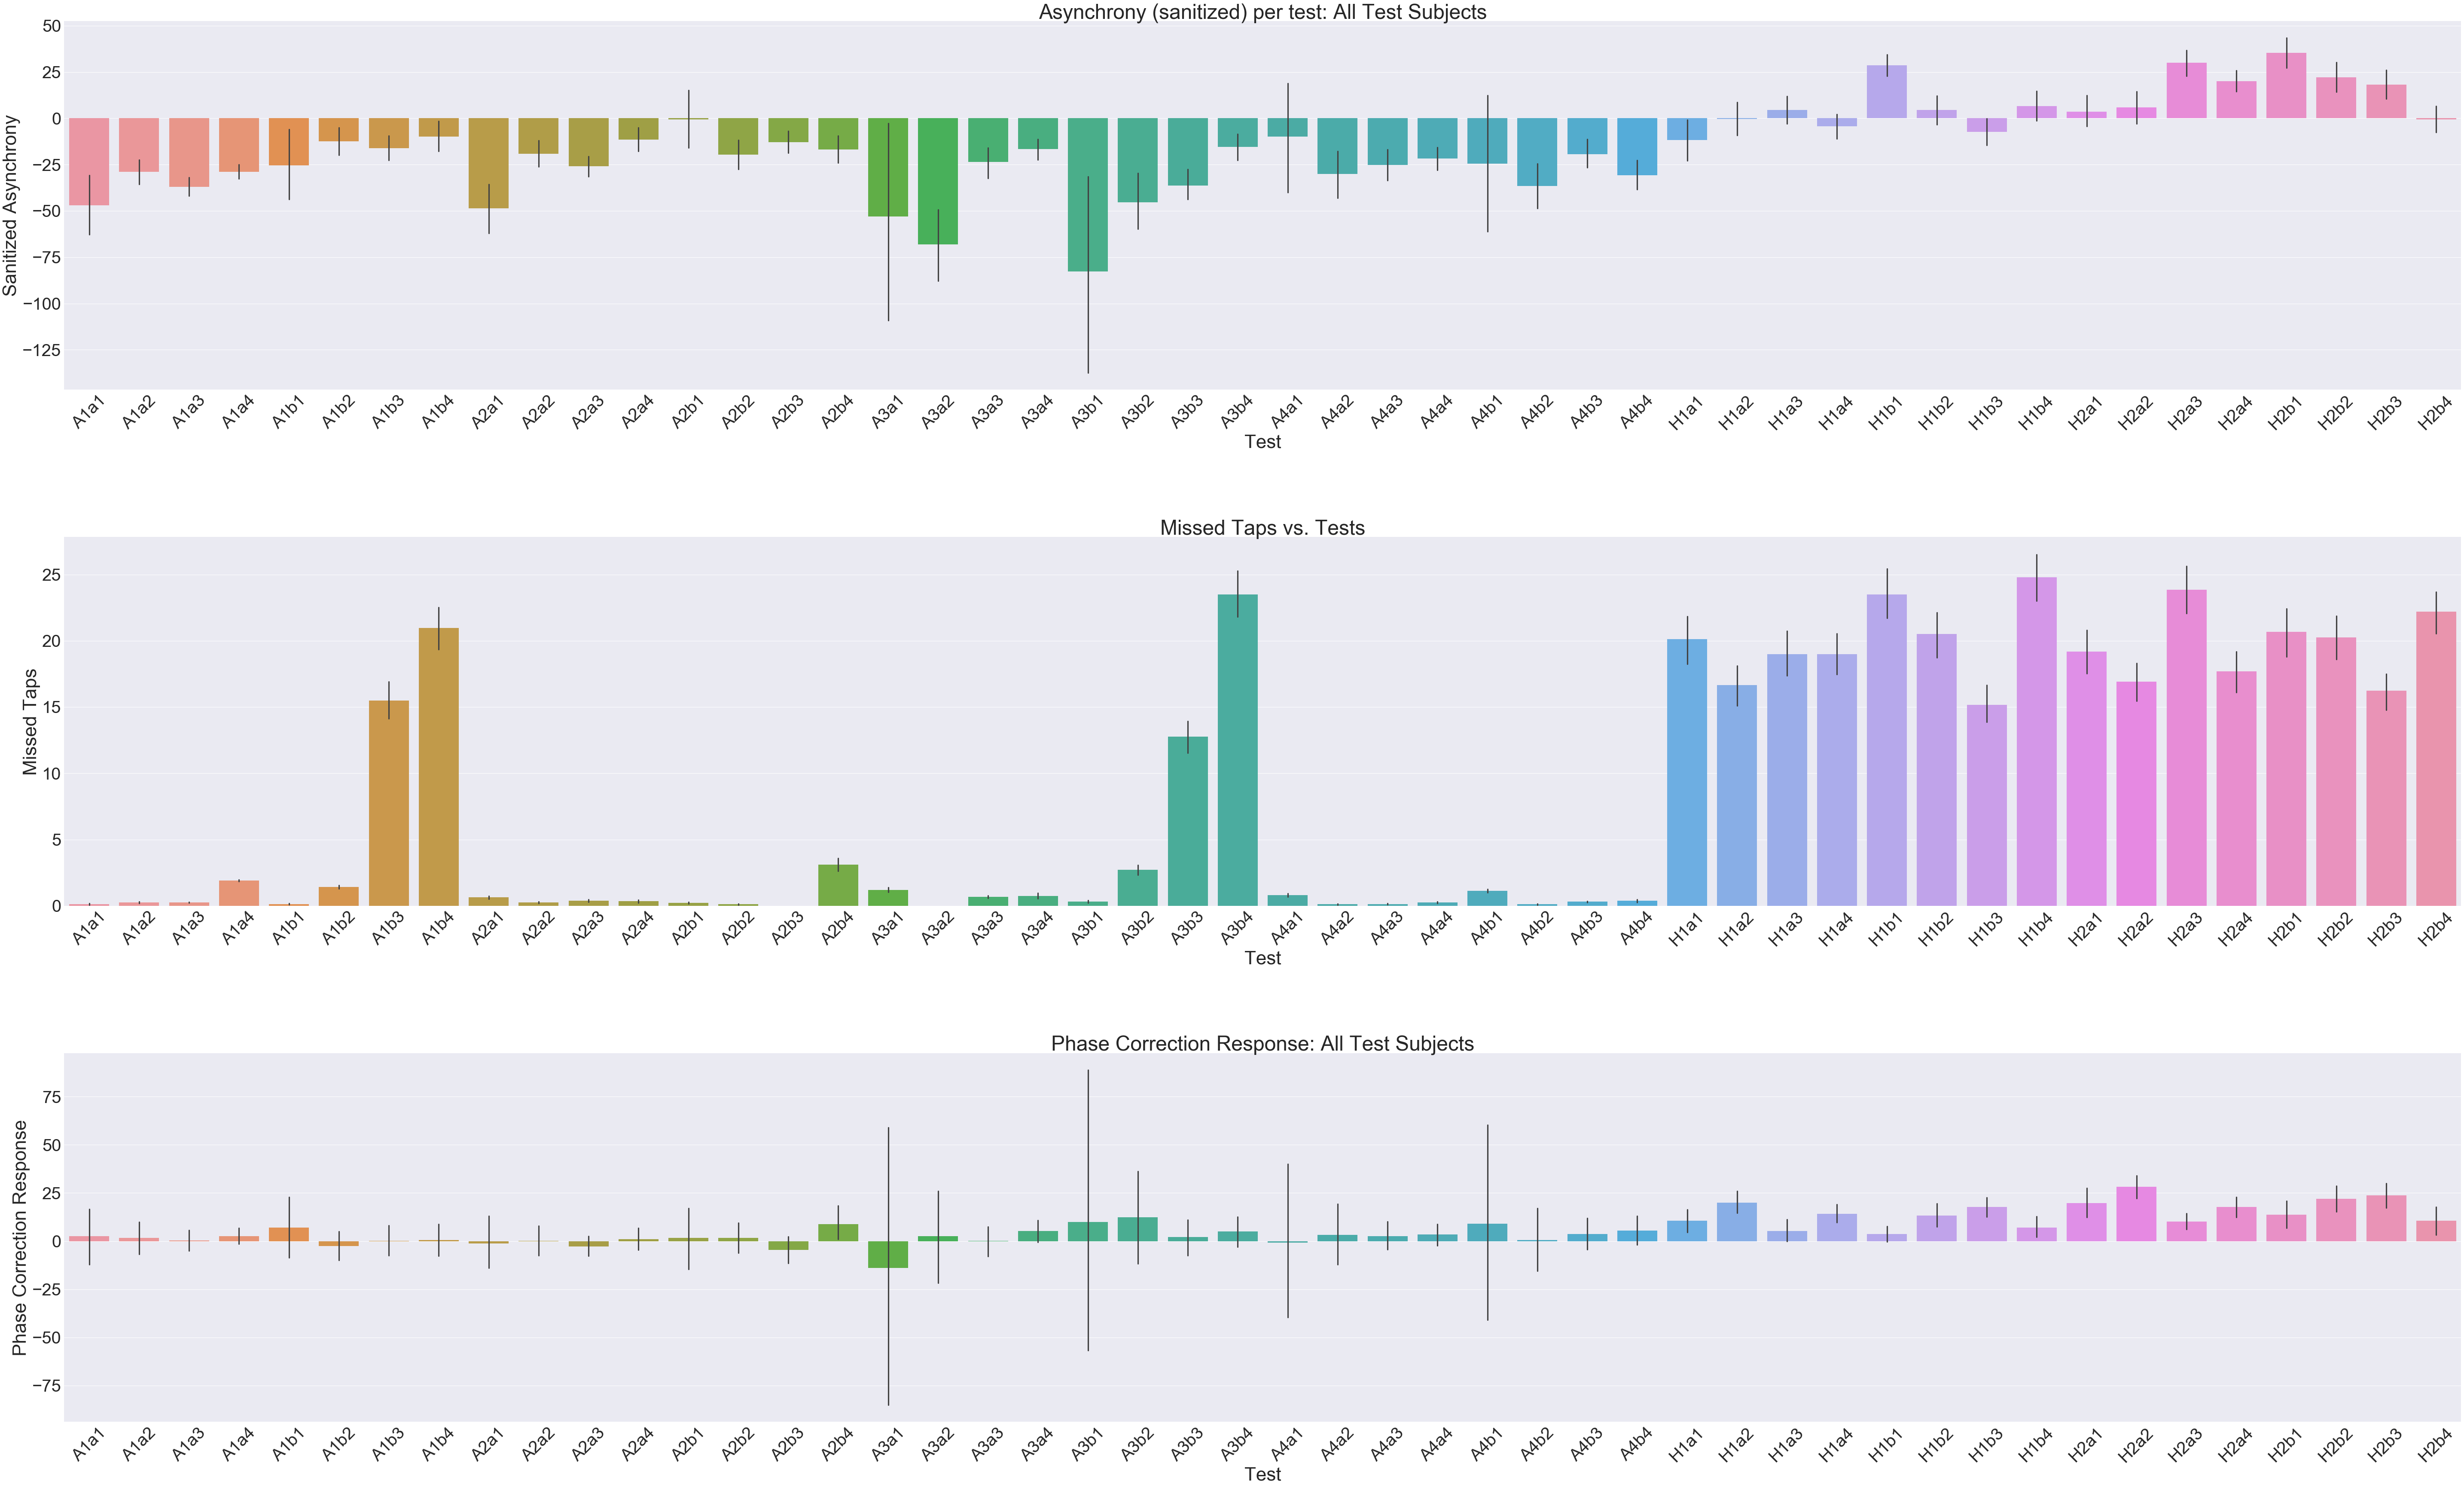

In [169]:
fig, axs = plt.subplots(nrows=3);
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)
sns.barplot(x="Test",y="Sanitized Asynchrony",data=df,dodge=True,ax=axs[0],order=testList).set_title("Asynchrony (sanitized) per test: All Test Subjects");
sns.barplot(x="Test",y="Missed Taps",data=df,dodge=True,ax=axs[1],order=testList).set_title("Missed Taps vs. Tests");
sns.barplot(x="Test",y="Phase Correction Response",data=df,dodge=True,ax=axs[2],order=testList).set_title("Phase Correction Response: All Test Subjects");
plt.savefig('AllSummary.png');

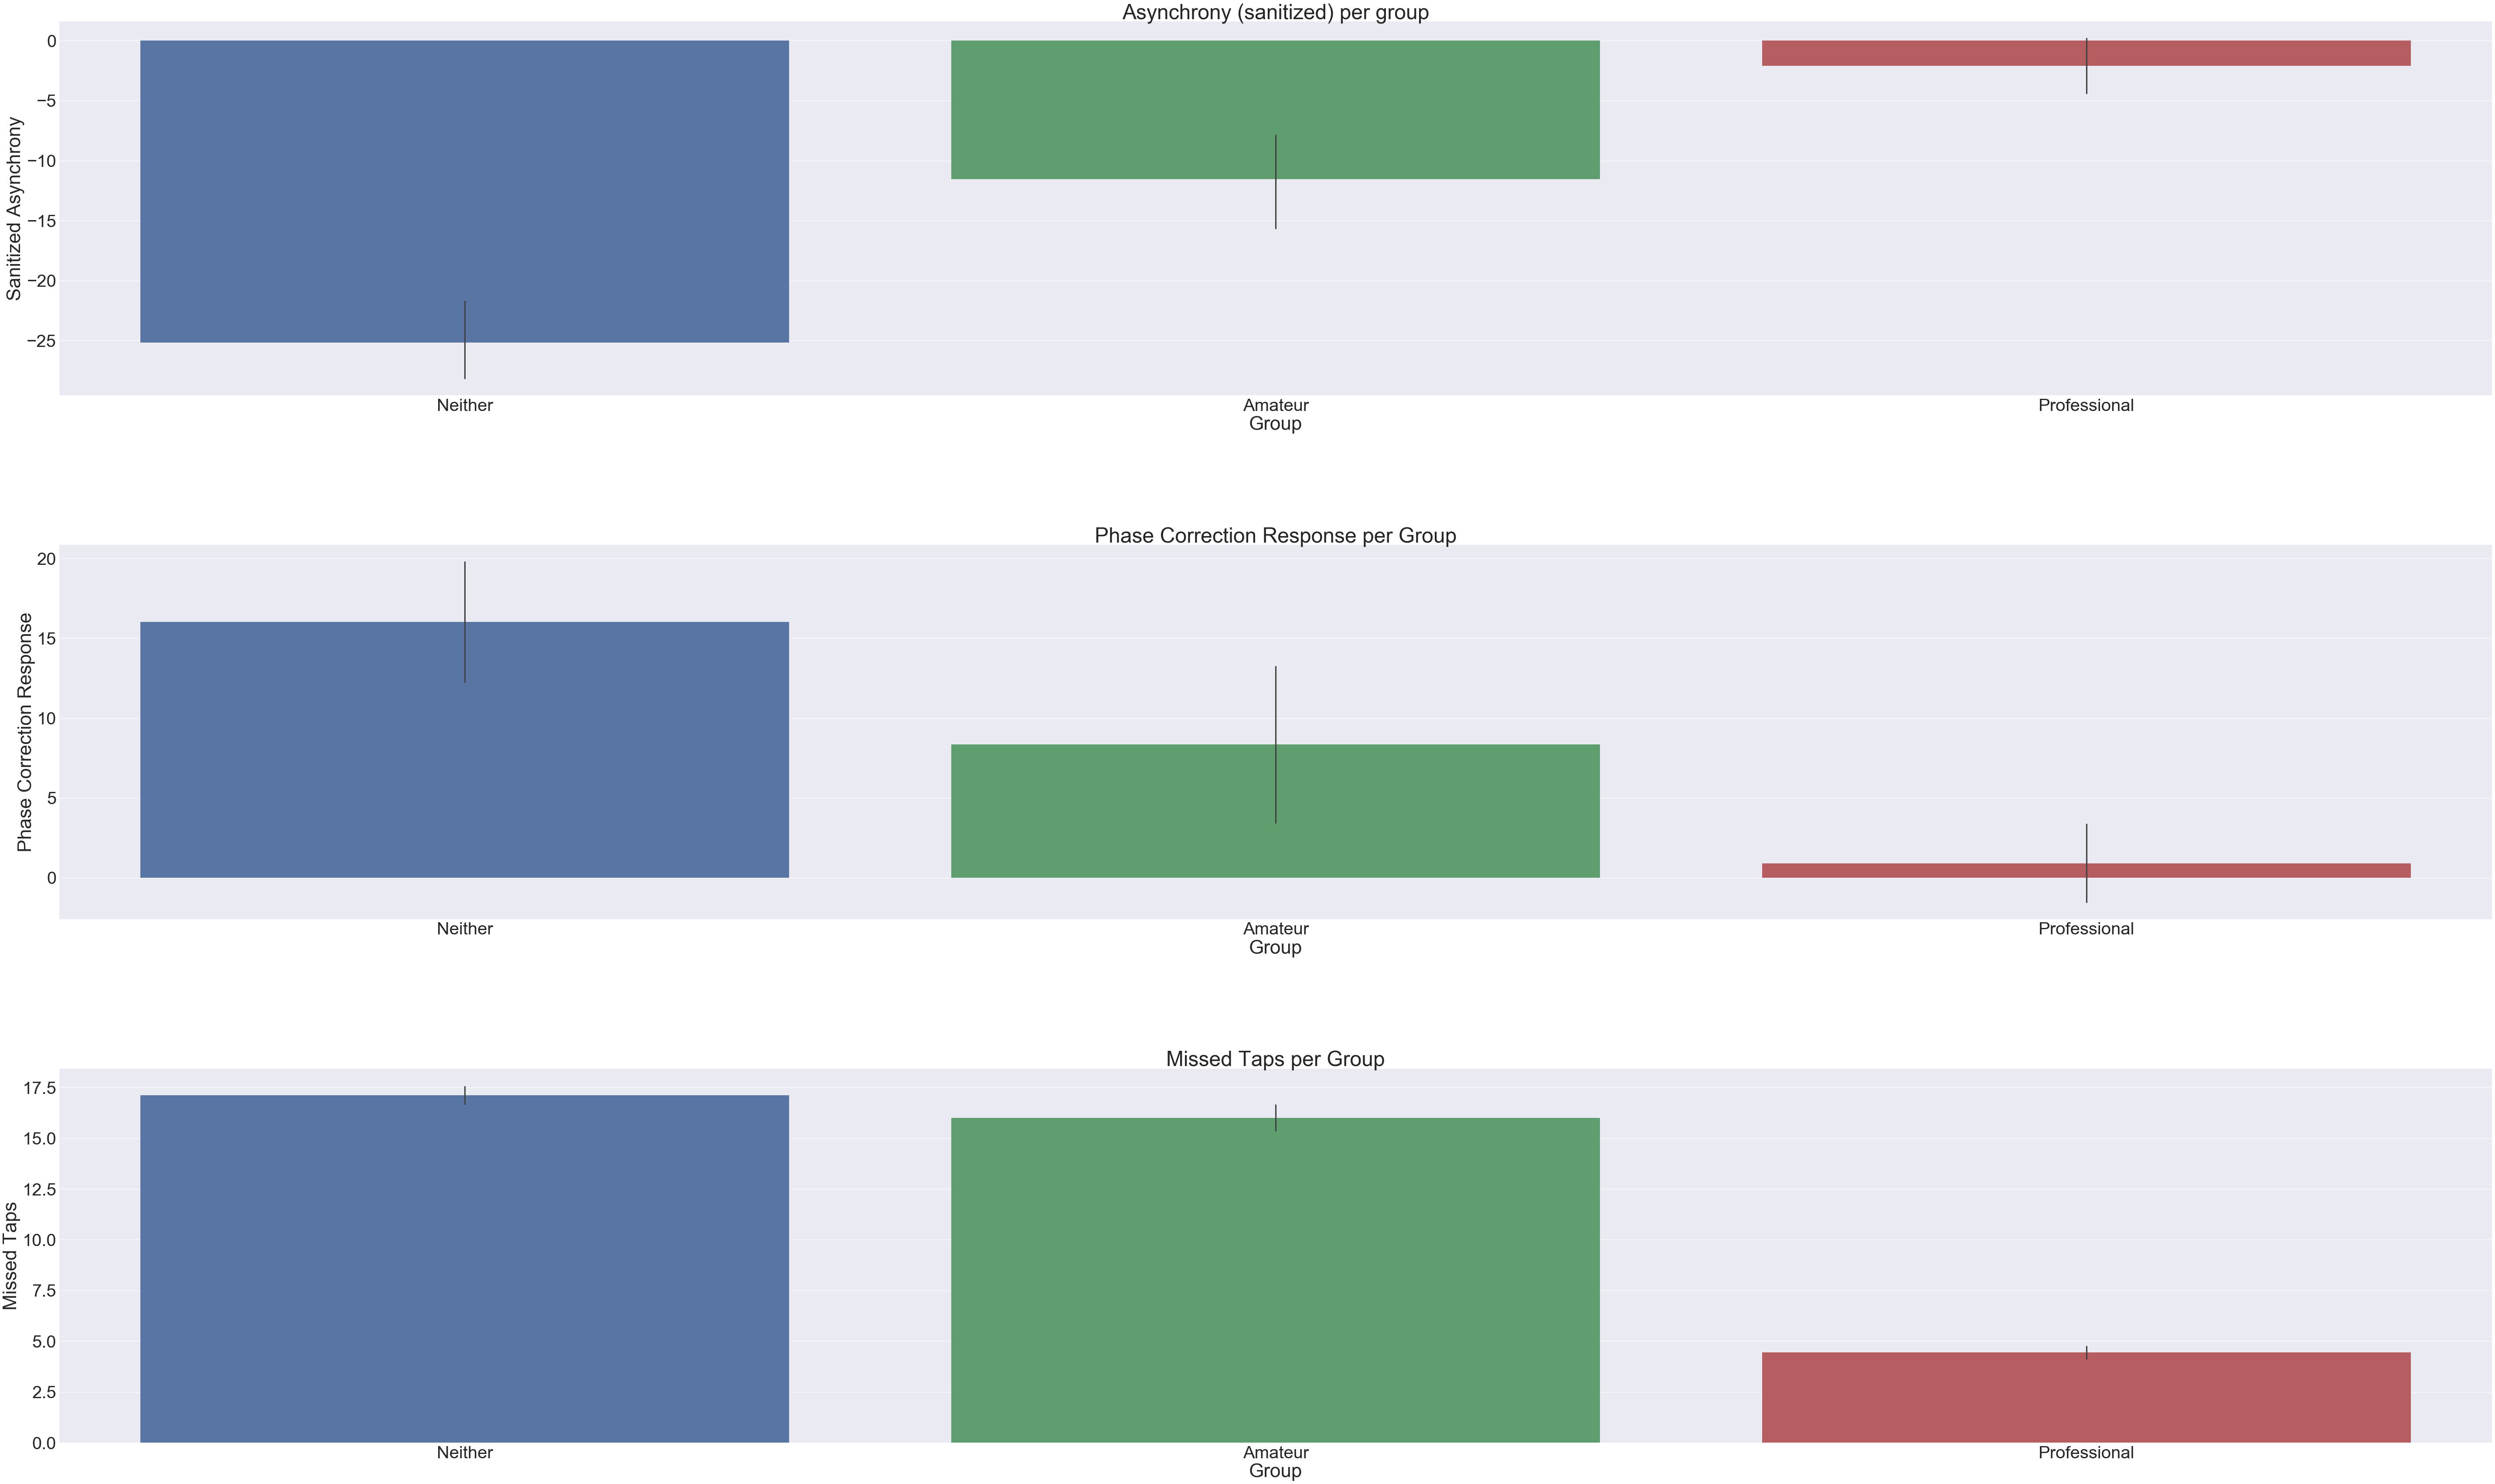

In [170]:
fig, axs = plt.subplots(nrows=3); 
plt.subplots_adjust(hspace=0.4, wspace=0.4)
sns.barplot(x="Group",y="Sanitized Asynchrony",data=df,dodge=True,ax=axs[0]).set_title("Asynchrony (sanitized) per group"); 
sns.barplot(x="Group",y="Phase Correction Response",data=df,dodge=True,ax=axs[1]).set_title("Phase Correction Response per Group"); 
sns.barplot(x="Group",y="Missed Taps",data=df,dodge=True,ax=axs[2]).set_title("Missed Taps per Group"); 
plt.savefig('GroupSummaries.png');

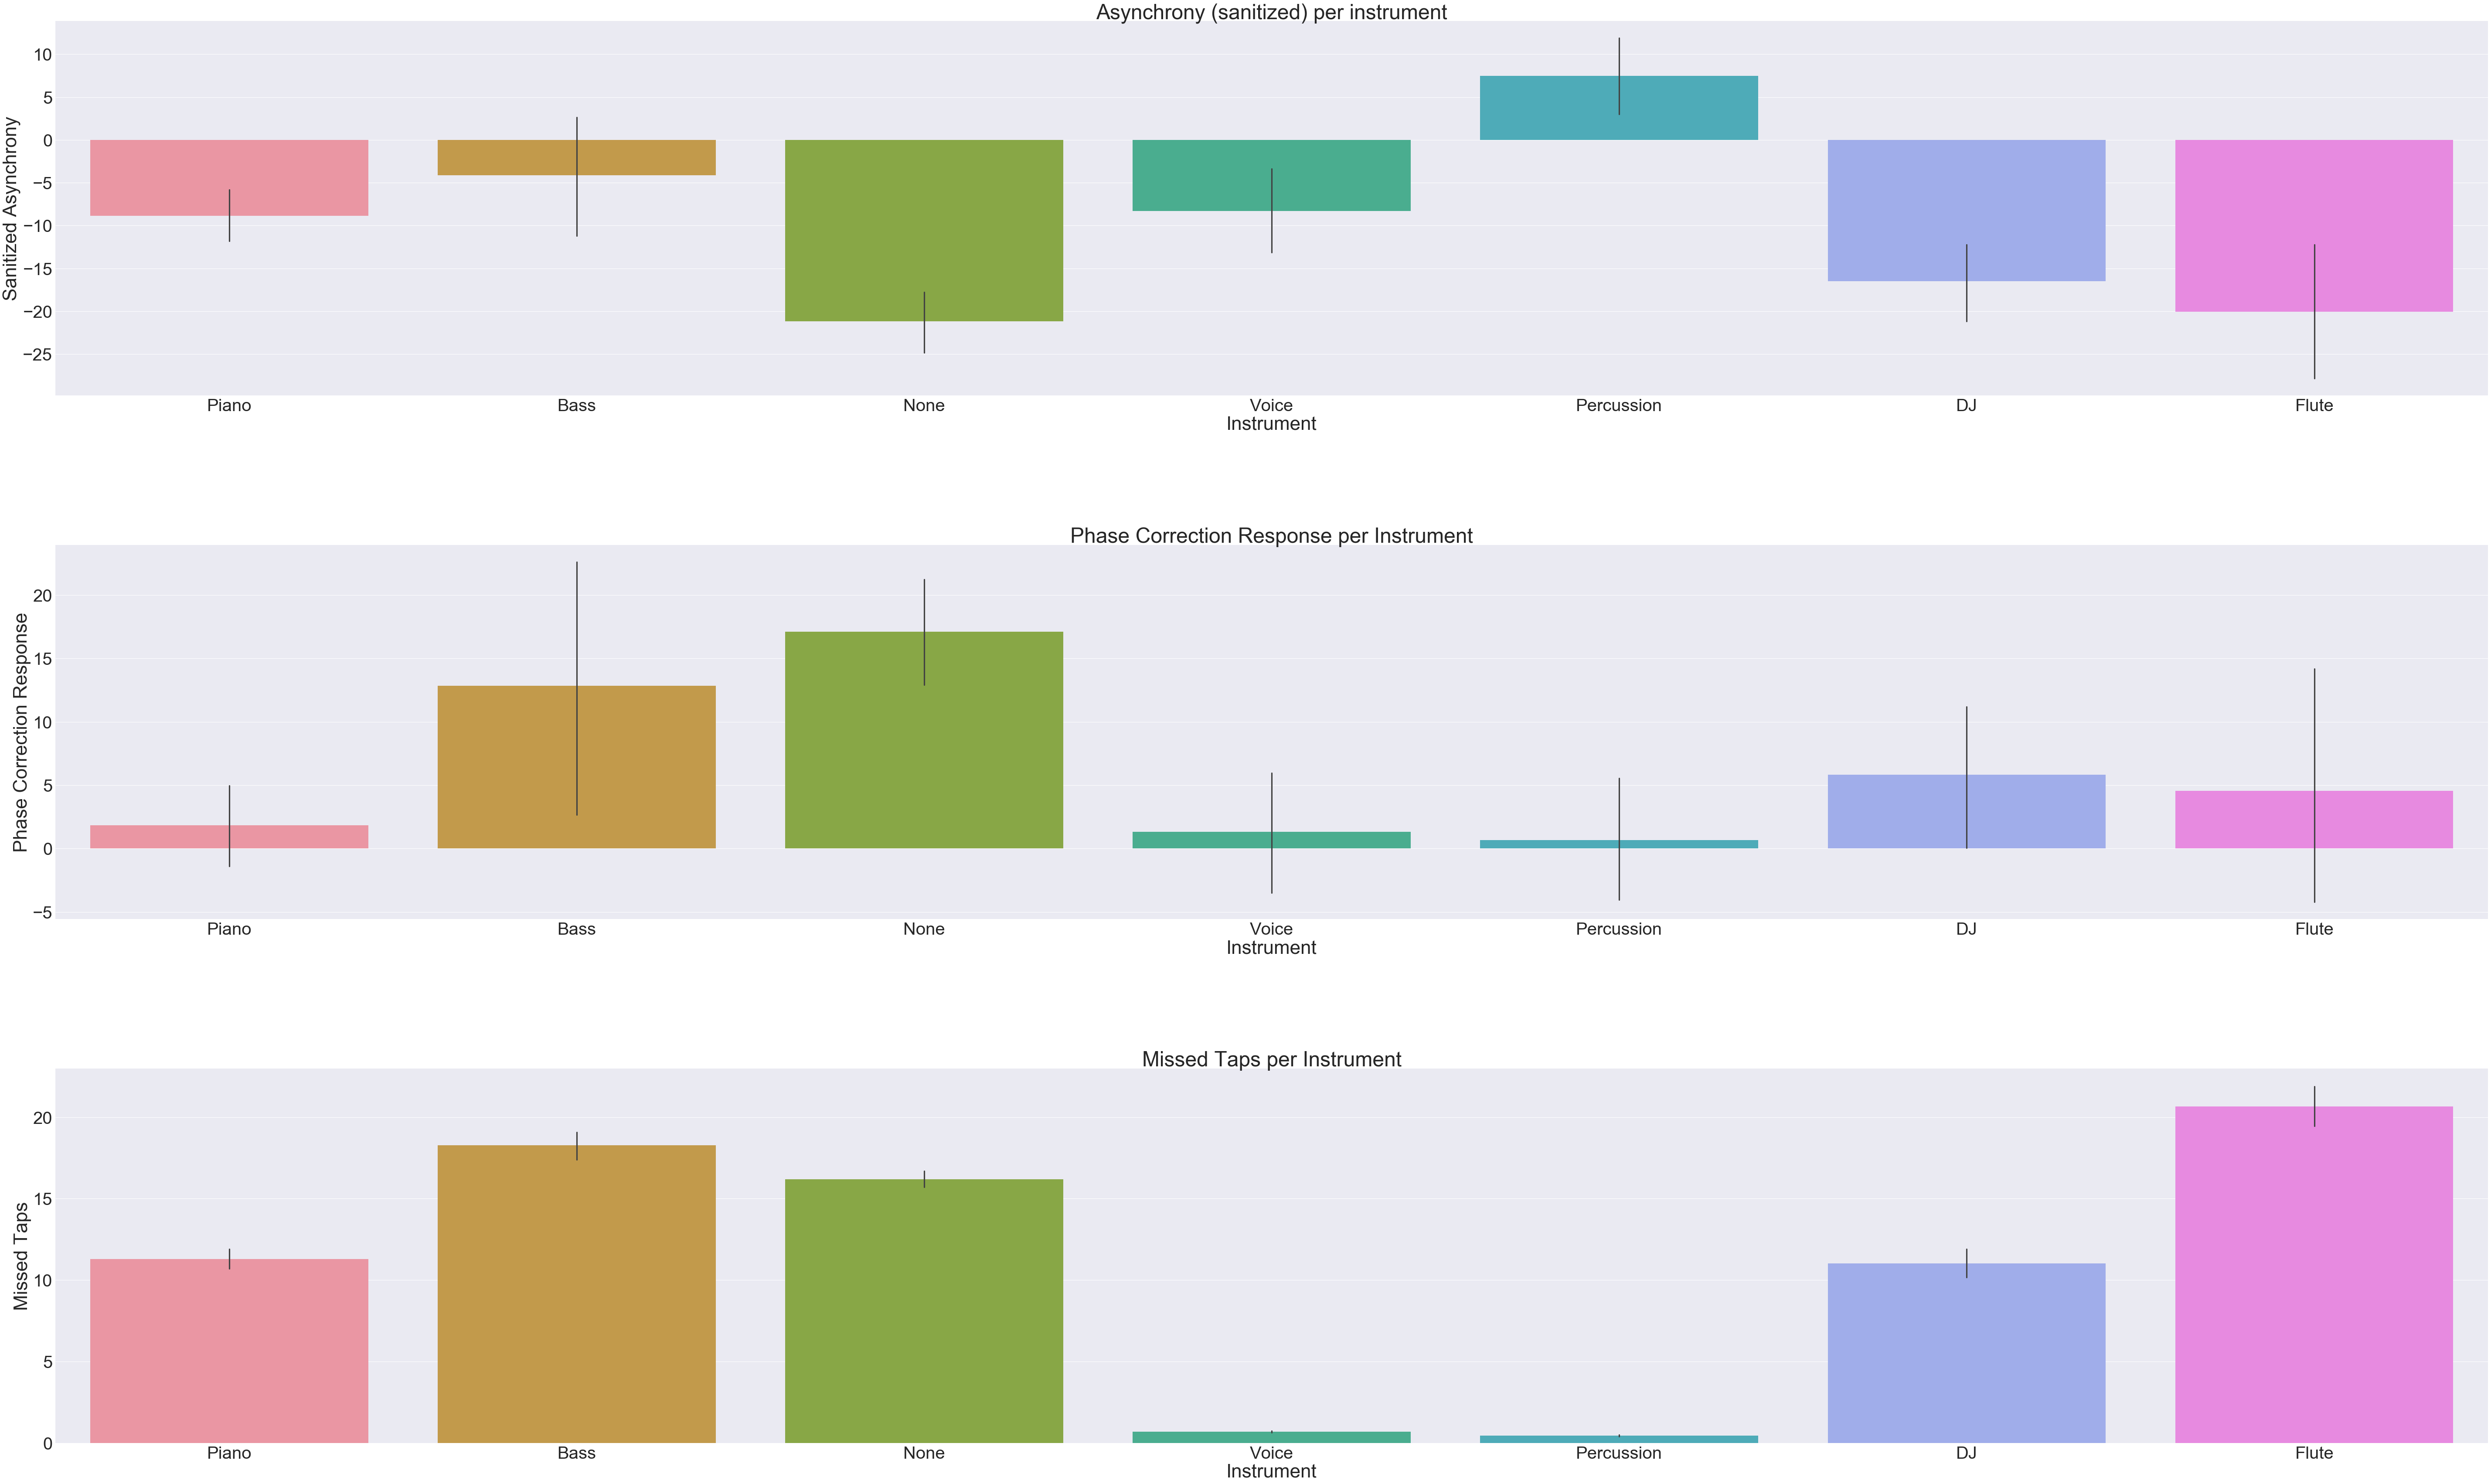

In [171]:
fig, axs = plt.subplots(nrows=3); 
# plt.subplots_adjust(top=.9);
# fig.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
sns.barplot(x="Instrument",y="Sanitized Asynchrony",data=df,dodge=True,ax=axs[0]).set_title("Asynchrony (sanitized) per instrument"); 
sns.barplot(x="Instrument",y="Phase Correction Response",data=df,dodge=True,ax=axs[1]).set_title("Phase Correction Response per Instrument");
sns.barplot(x="Instrument",y="Missed Taps",data=df,dodge=True,ax=axs[2]).set_title("Missed Taps per Instrument");
plt.savefig('InstrumentSummaries.png');

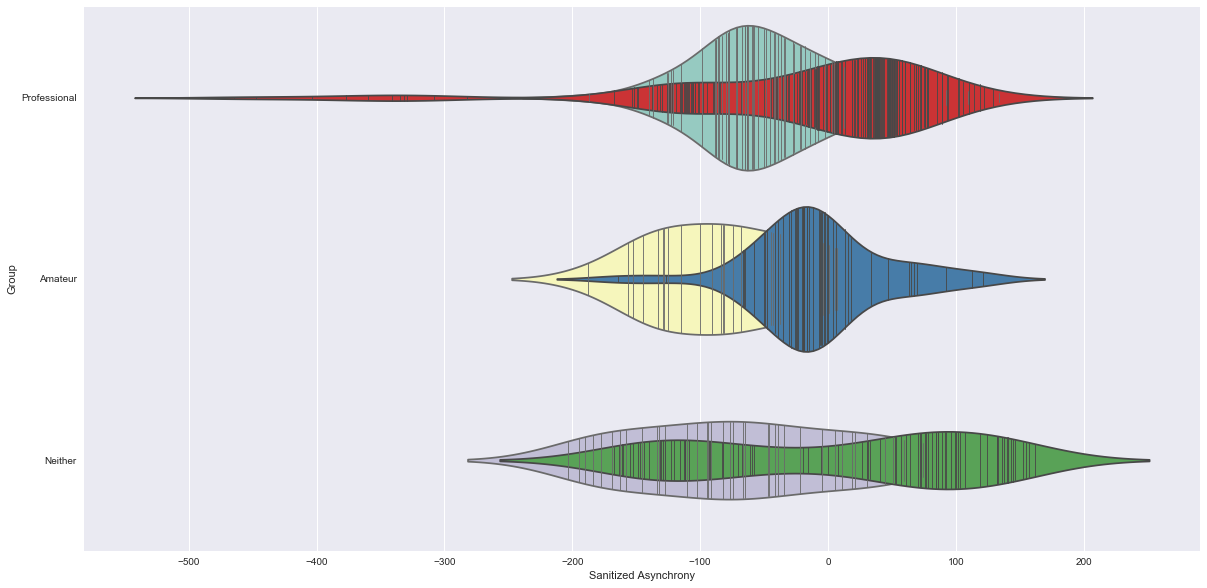

In [86]:
sns.violinplot(pd["Sanitized Asynchrony"][pd.Test == 'A1a1'],pd.Group,split=True, inner="stick", palette="Set3")
sns.violinplot(pd["Sanitized Asynchrony"][pd.Test == 'H1a1'],pd.Group,split=True, inner="stick", palette="Set1")

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

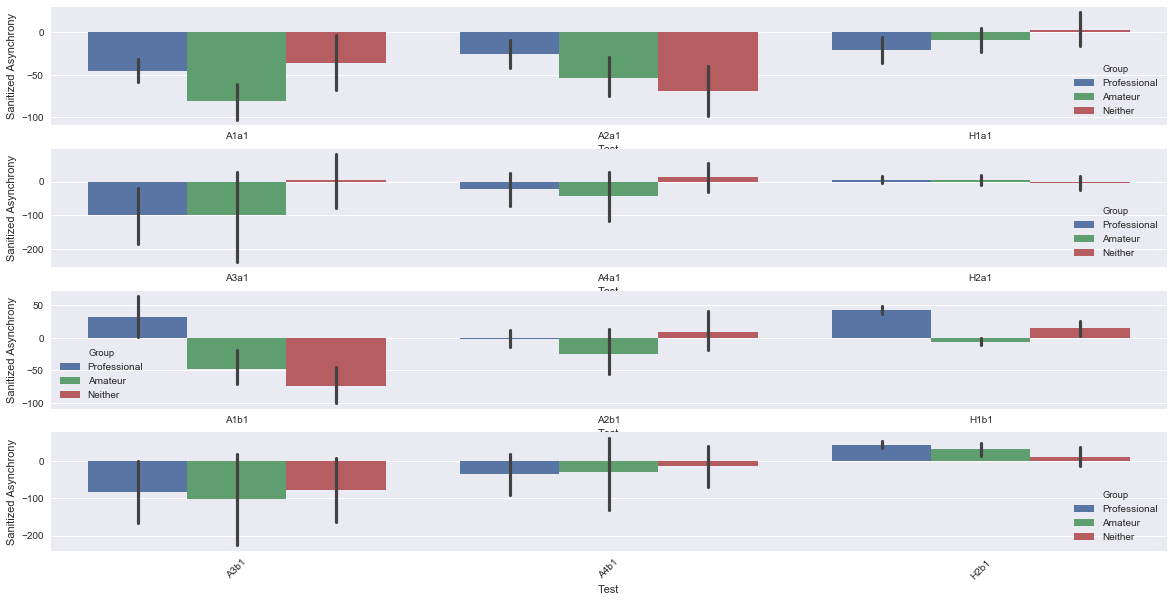

In [36]:
fig, axs = plt.subplots(nrows=4)
testList= ['A1a1','A2a1','H1a1']
testList2 = ['A3a1','A4a1','H2a1']
testList3 = ['A1b1','A2b1','H1b1']
testList4= ['A3b1','A4b1','H2b1']
newdf = pd[pd.Test.isin(testList)]
newdf2 = pd[pd.Test.isin(testList2)]
newdf3 = pd[pd.Test.isin(testList3)]
newdf4 = pd[pd.Test.isin(testList4)]
sns.barplot(y="Sanitized Asynchrony", x="Test", hue="Group", data=newdf,dodge=True,ax=axs[0])
sns.barplot(y="Sanitized Asynchrony", x="Test", hue="Group", data=newdf2,dodge=True,ax=axs[1])
sns.barplot(y="Sanitized Asynchrony", x="Test", hue="Group", data=newdf3,dodge=True,ax=axs[2])
sns.barplot(y="Sanitized Asynchrony", x="Test", hue="Group", data=newdf4,dodge=True,ax=axs[3])
plt.xticks(rotation=45)

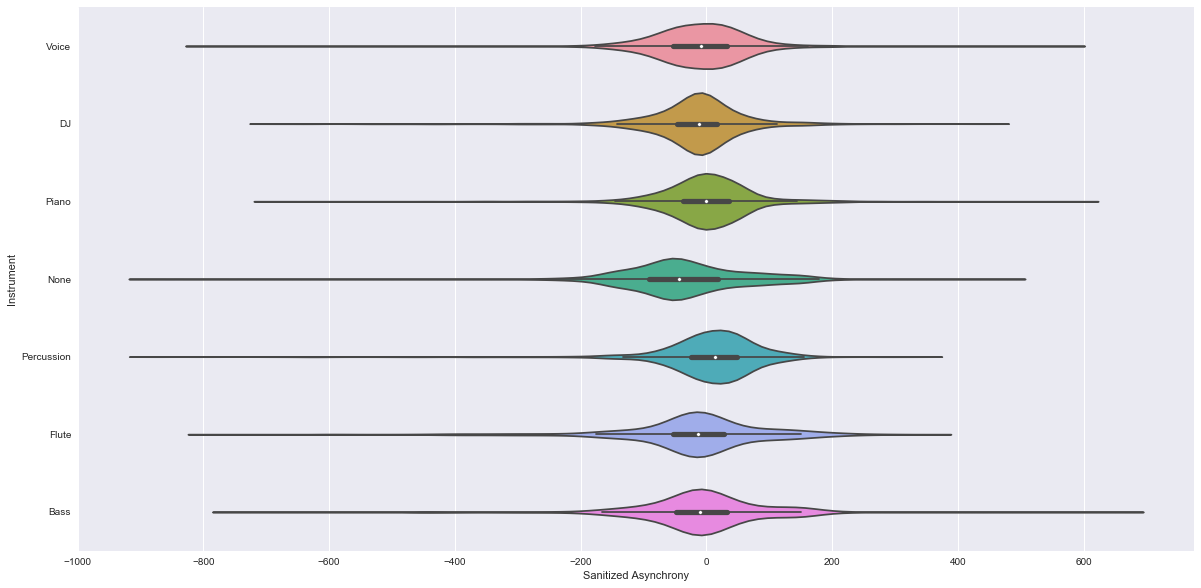

In [72]:
sns.violinplot(pd["Sanitized Asynchrony"],pd.Instrument)

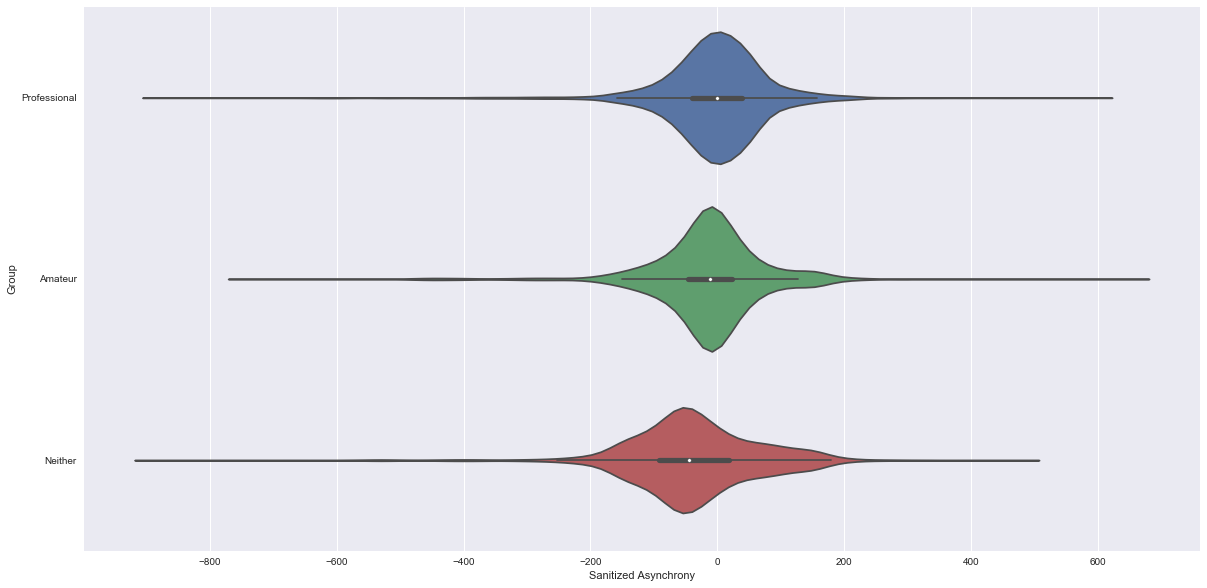

In [116]:
sns.violinplot(pd["Sanitized Asynchrony"],pd.Group)

In [15]:
def paired_ttest(x, y):
    """
    Function that will calculate the t-ratio
    :param x: list of scores in first condition
    :param y: list of scores in second condition
    :return statistics: a dictionary containing the t-value, p-value,
    and degrees of freedom
    """
    # Difference scores are going to be stored in a list
    di = []
    # Sample size = the length of variable x
    n = len(x)
    df = n-1

    # For each subject append the difference score between x & y
    # i is the index so we do the substraction for each subjects score on x and y
    for i in range(n):
        di.append(x[i] - y[i])

    # Avarage of the difference score. Note, division of integers in Python will result in an integer. Thus, we need
    # to convert one of the numbers to float datatype (using float())
    dbar = float(sum(di))/n

    # Calculation of standard deviation for the difference score
    std_di = 0

    # Each subjects difference score is subtracted by the avarage and exponated (i.e., "**2)
    for d in di:
        std_di += (d-dbar)**2

    # We get the standard deviation by dividing what was calculated above (std_di) by sample size (n). This value is
    # squared.
    std_di = np.sqrt(std_di/n)

    # Standard error of the mean is simple: standard deviation divided by the sample size -1 squared.
    se_dbar = std_di/np.sqrt(n-1)

    # T-ratio is calculated by dividing the avarage by the standard error of the mean
    t_val = dbar/se_dbar

    # P-value
    pval = t.sf(np.abs(t_val), df) * 2.

    # Last, we create the dictionary containing the needed statistics
    statistics = {'T-value': t_val, 'Degree of Freedom': df, 'P-value': pval}

    # Function returns a dictionary:
    return statistics

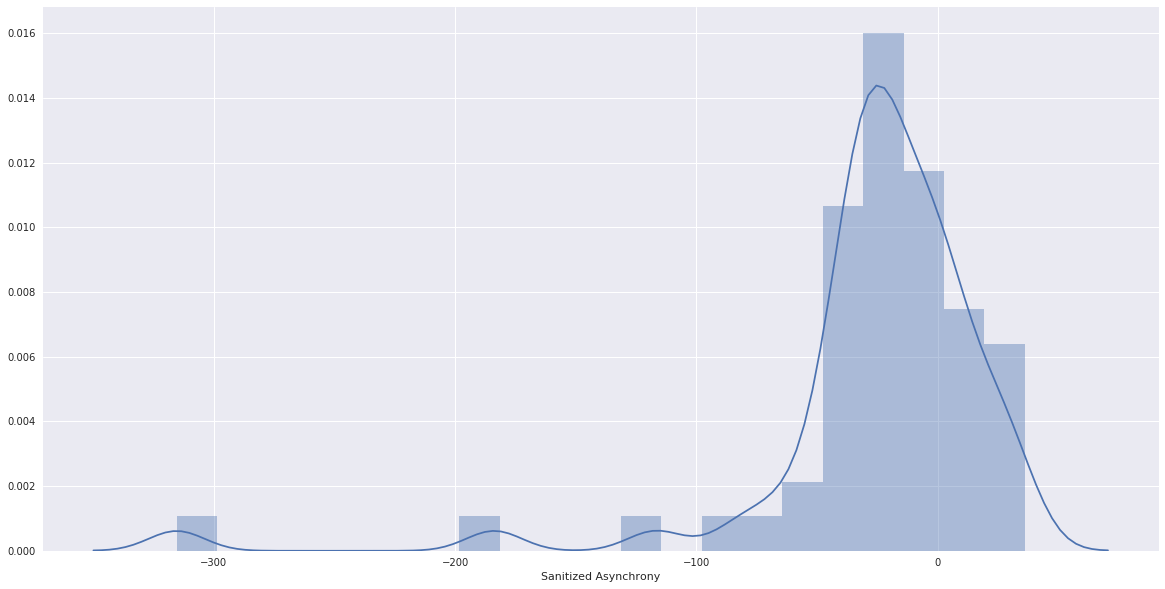

In [153]:
#Performance per Test
group_df = pd.groupby(['Test'])
test = group_df['Sanitized Asynchrony'].mean()
sns.distplot(test);

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



count       mean         std      min       25%      50%  \
Instrument                                                              
Bass         992.0 -11.190331  110.475438 -730.057 -47.60625  -9.4915   
DJ          1429.0 -19.646563   87.027726 -685.619 -46.51500 -12.1050   
Flute        932.0 -19.196704  117.542338 -764.643 -53.37250 -13.4735   
None        3375.0 -38.443774  110.353349 -875.079 -91.71350 -44.2490   
Percussion  1512.0   2.839540   93.785726 -874.445 -23.98600  14.3350   
Piano       3009.0  -2.693388   81.003202 -687.020 -36.99600  -0.1250   
Voice       1505.0 -12.723079   96.270015 -783.868 -53.56900  -8.0480   

                 75%      max  
Instrument                     
Bass        32.26275  639.355  
DJ          17.02800  440.052  
Flute       28.50100  329.070  
None        17.87300  463.505  
Percussion  48.60725  331.111  
Piano       35.97000  590.427  
Voice       33.13300  557.114

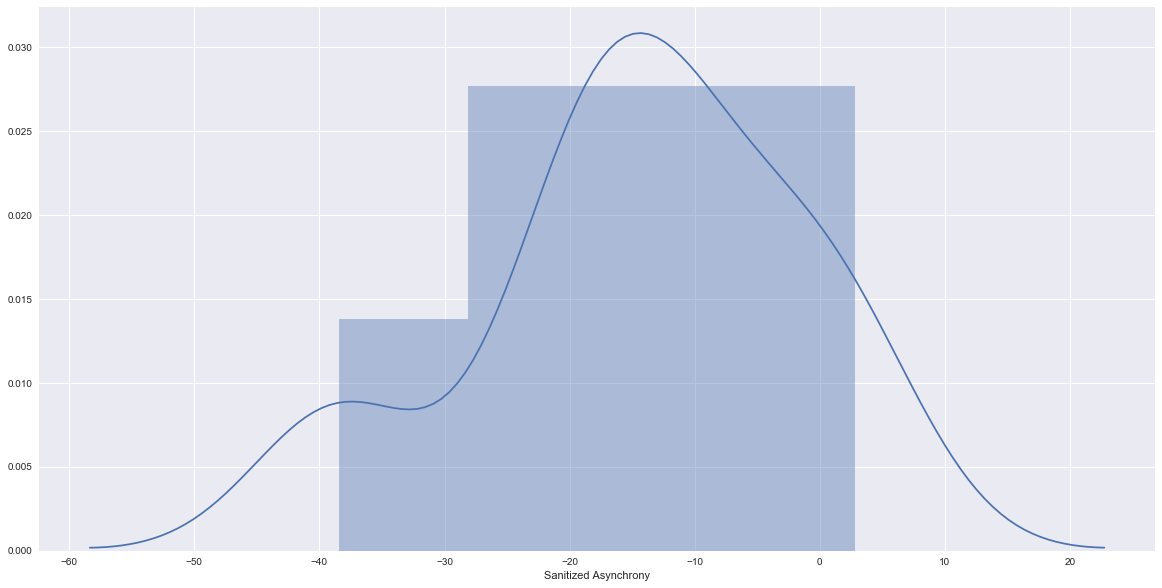

In [41]:
#Performance per User per Test
# grouped_df = pd.groupby(['Test','Group','Instrument','User ID']);
grouped_df = pd.groupby(['Instrument']);
x = grouped_df['Sanitized Asynchrony'].mean()
sns.distplot(x)
grouped_df['Sanitized Asynchrony'].describe()

In [37]:
means = grouped_df['Sanitized Asynchrony'].mean()
x, y = means['A1a1'].values,means['A3a1'].values
t_value = paired_ttest(x,y)
for key, value in t_value.items():
    t_value[key] = round(value, 3)
 
print(t_value)

{'P-value': 0.356, 'Degree of Freedom': 9, 'T-value': 0.973}


In [40]:
stats.ttest_rel(a=x,b=y)

Ttest_relResult(statistic=0.9726996797647363, pvalue=0.3561181440073)

In [26]:
stats.t.ppf(q=0.025,df=9)

-2.262157162740992

In [28]:
stats.t.ppf(q=0.975,df=9)

2.2621571627409915

In [31]:
stats.t.cdf(x=-0.53,df=9)*2

0.6089366906430735

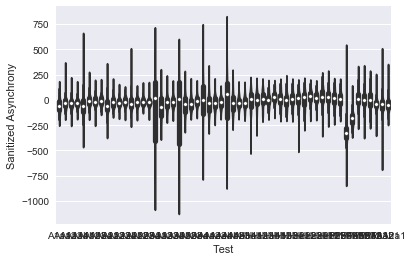

In [5]:
viol_ax = sns.violinplot(x="Test",y="Sanitized Asynchrony",palette='colorblind',data=pd)

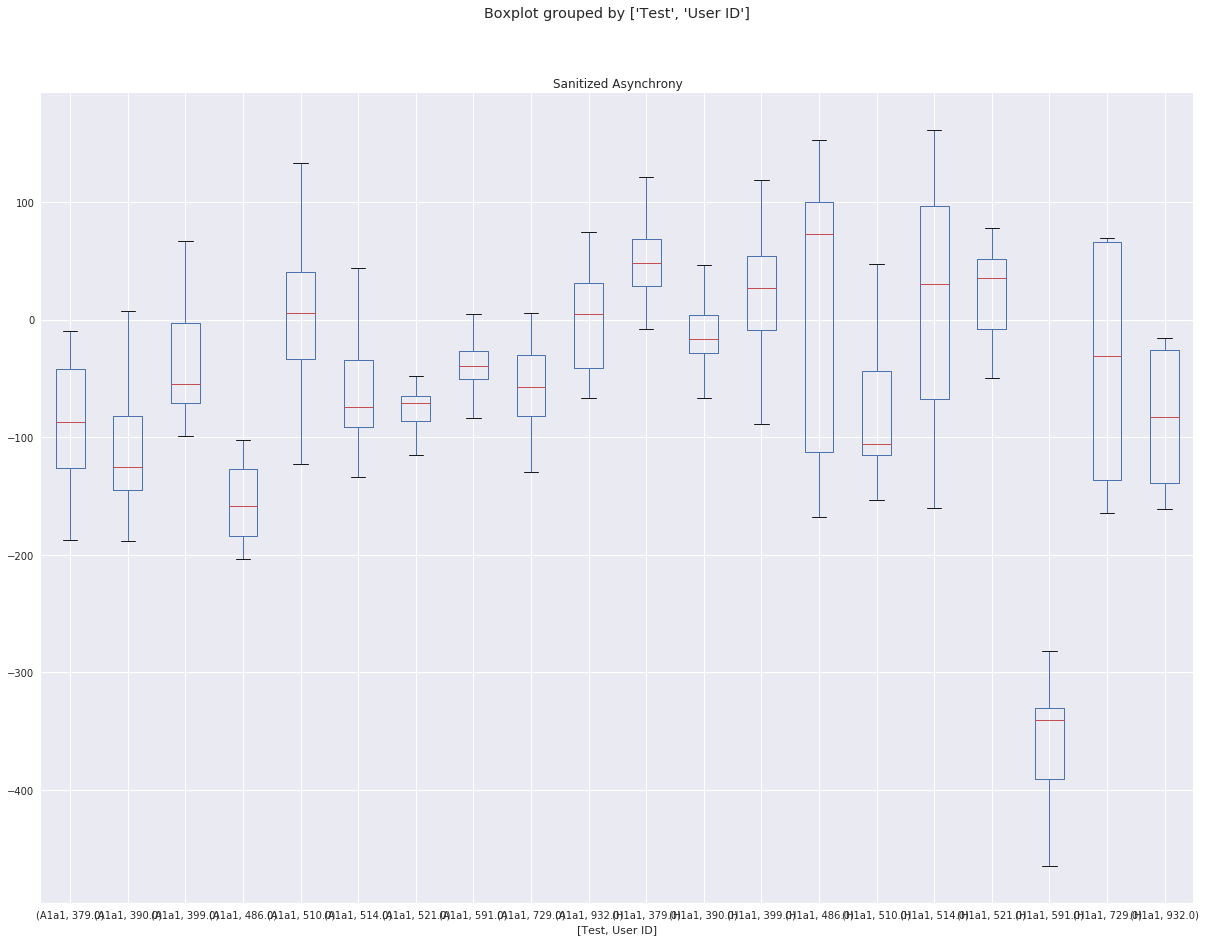

In [3]:
fig,ax = plt.subplots(figsize=(20,15))
compare_1 = pd.loc[pd['Test'].isin(['A1a1','H1a1'])];
compare_1.boxplot(column=['Sanitized Asynchrony'],by=['Test','User ID'],ax=ax);
# compare_1.iplot(kind='box',filename='cufflinks/box-plots')

In [84]:
import plotly.offline as off

off.init_notebook_mode(connected=True)

data = [dict(
  type = 'bar',
  x = pd['Test'],
  y = pd['Sanitized Asynchrony'],
  mode = 'markers',
  transforms = [dict(
    type = 'groupby',
    groups = pd['User ID']
  )]
)]

off.iplot({'data': data}, validate=False)